<div style="font-family: Arial, sans-serif; text-align: center;">

# CodeAlpha Project 3


# Sales Prediction


</div>


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import  accuracy_score,mean_absolute_error,mean_squared_error,r2_score     
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import chardet
import pandas as pd

# Detect the encoding
with open('C:\\data science\\CodeSoft Internship\\ANN-  Car Sales Prediction\\car_purchasing.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Use the detected encoding
df = pd.read_csv('C:\\data science\\CodeSoft Internship\\ANN-  Car Sales Prediction\\car_purchasing.csv', encoding=result['encoding'])
df.head()


,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [5]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [6]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [7]:
df.shape

(500, 9)

In [8]:
df.nunique()

customer name          498
customer e-mail        500
country                211
gender                   2
age                    500
annual Salary          500
credit card debt       500
net worth              500
car purchase amount    500
dtype: int64

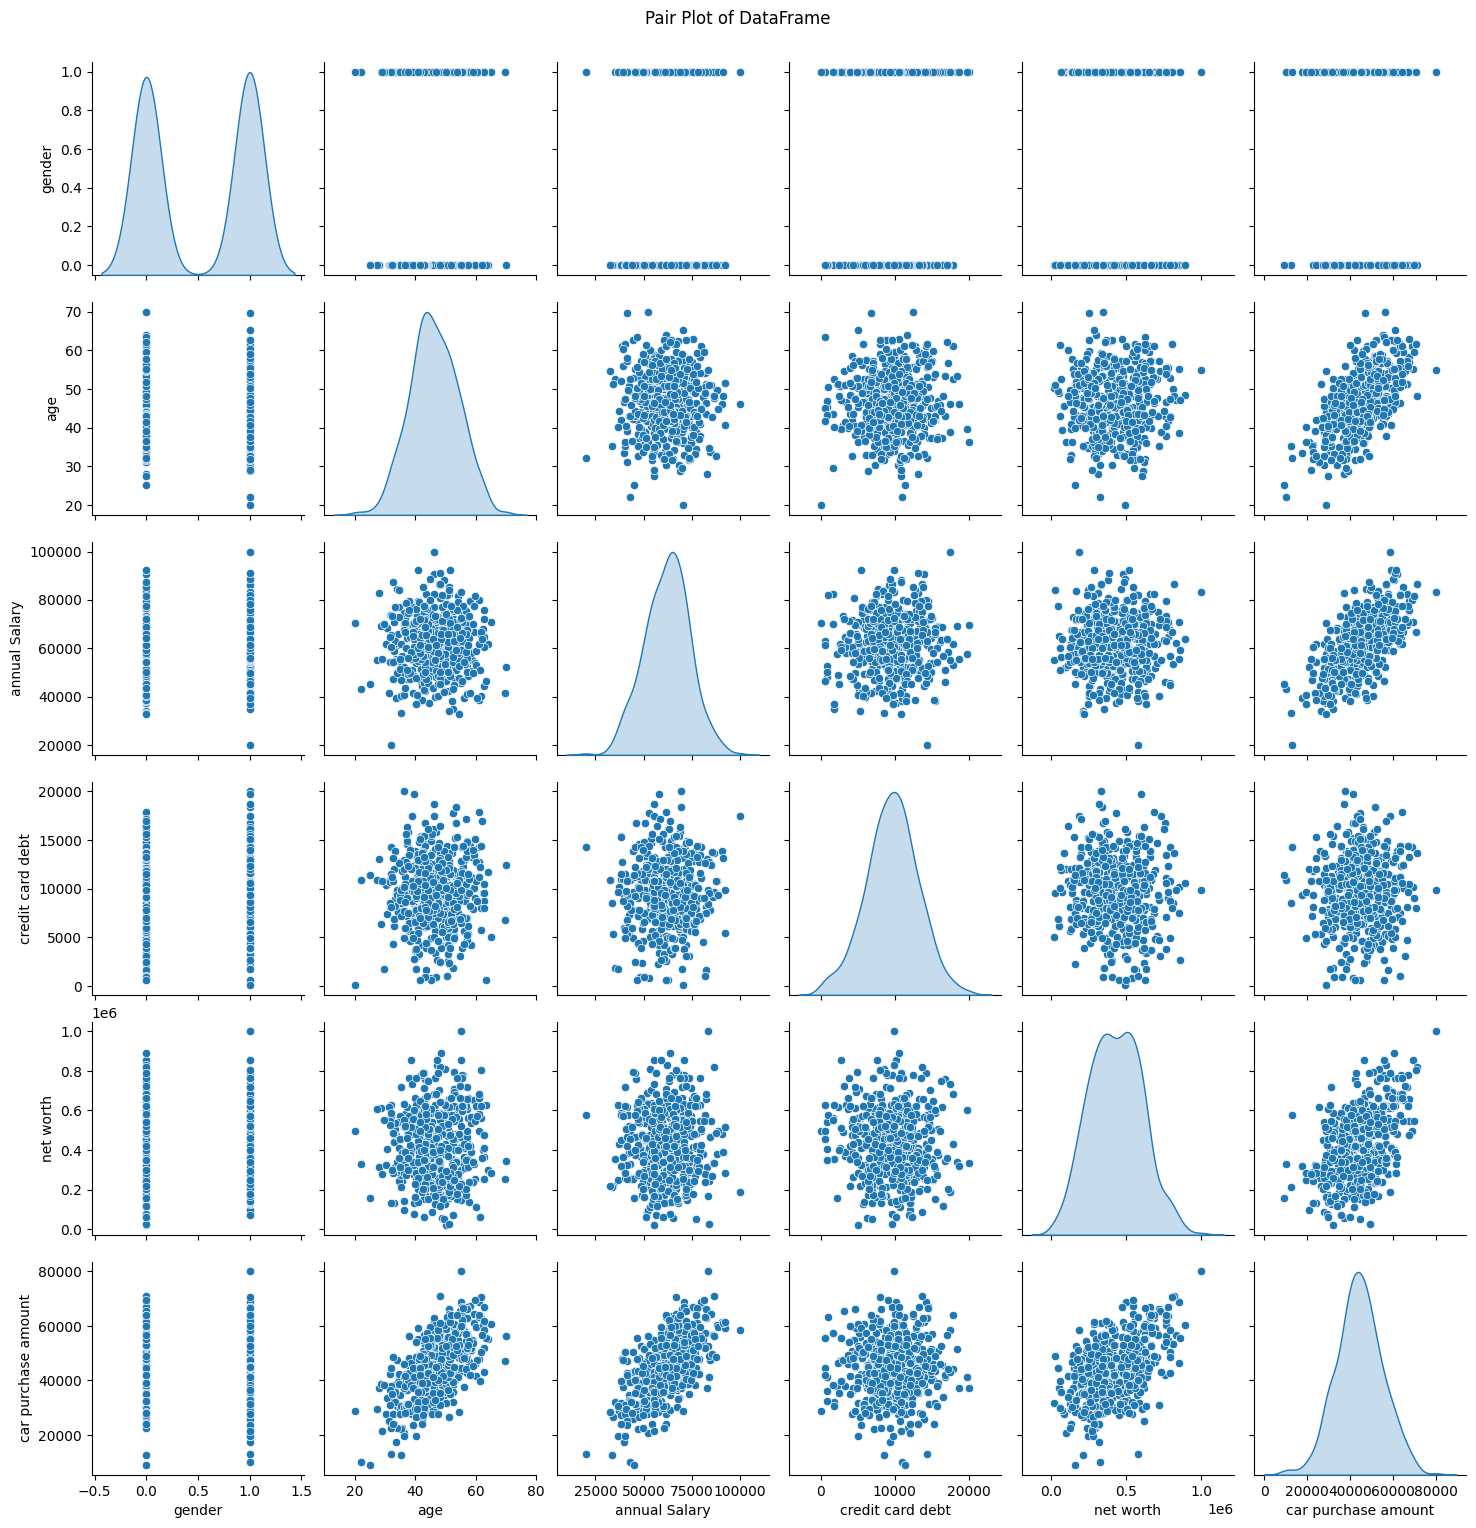

In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

sns.pairplot(df, diag_kind='kde',markers='o')
plt.suptitle("Pair Plot of DataFrame", y=1.02)
plt.show()

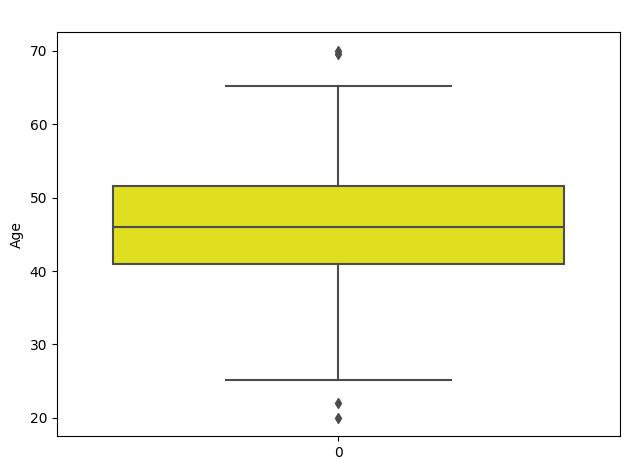

In [10]:
sns.boxplot(df['age'],color='yellow')
plt.title(" ")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

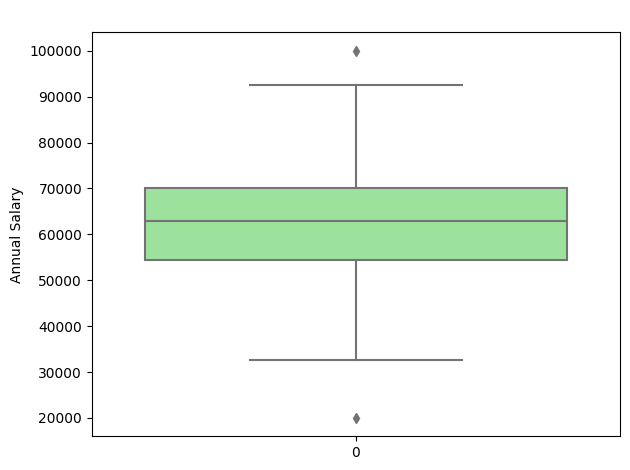

In [11]:
sns.boxplot(df['annual Salary'],color='lightgreen')
plt.title(" ")
plt.ylabel("Annual Salary")
plt.tight_layout()
plt.show()

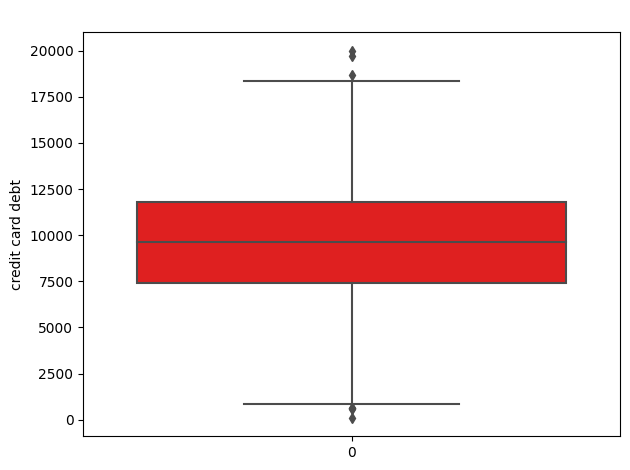

In [12]:
sns.boxplot(df['credit card debt'],color='red')
plt.title(" ")
plt.ylabel("credit card debt")
plt.tight_layout()
plt.show()

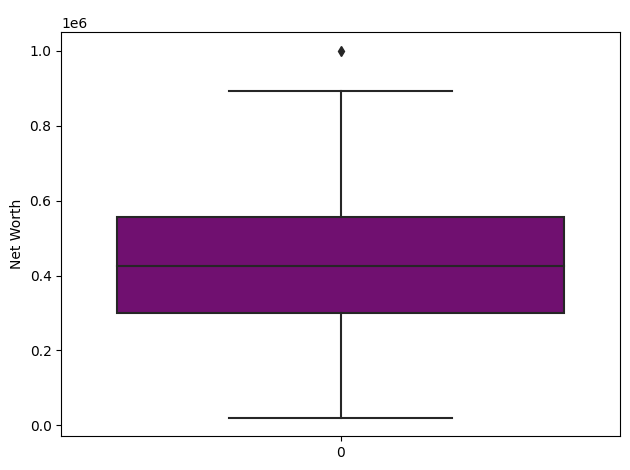

In [13]:
sns.boxplot(df['net worth'],color='purple')
plt.title(" ")
plt.ylabel("Net Worth")
plt.tight_layout()
plt.show()

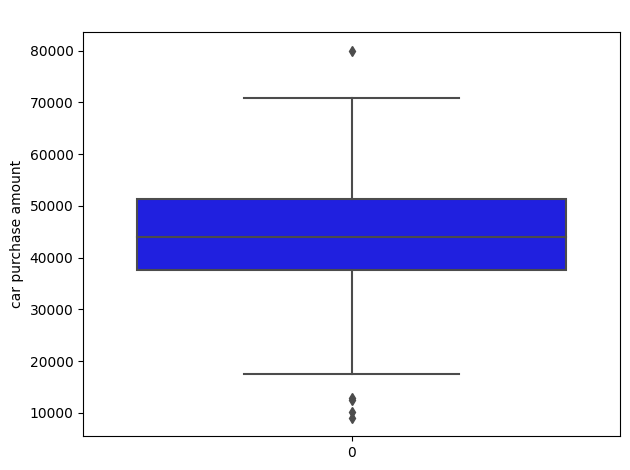

In [14]:
sns.boxplot(df['car purchase amount'],color='blue')
plt.title(" ")
plt.ylabel("car purchase amount")
plt.tight_layout()
plt.show()

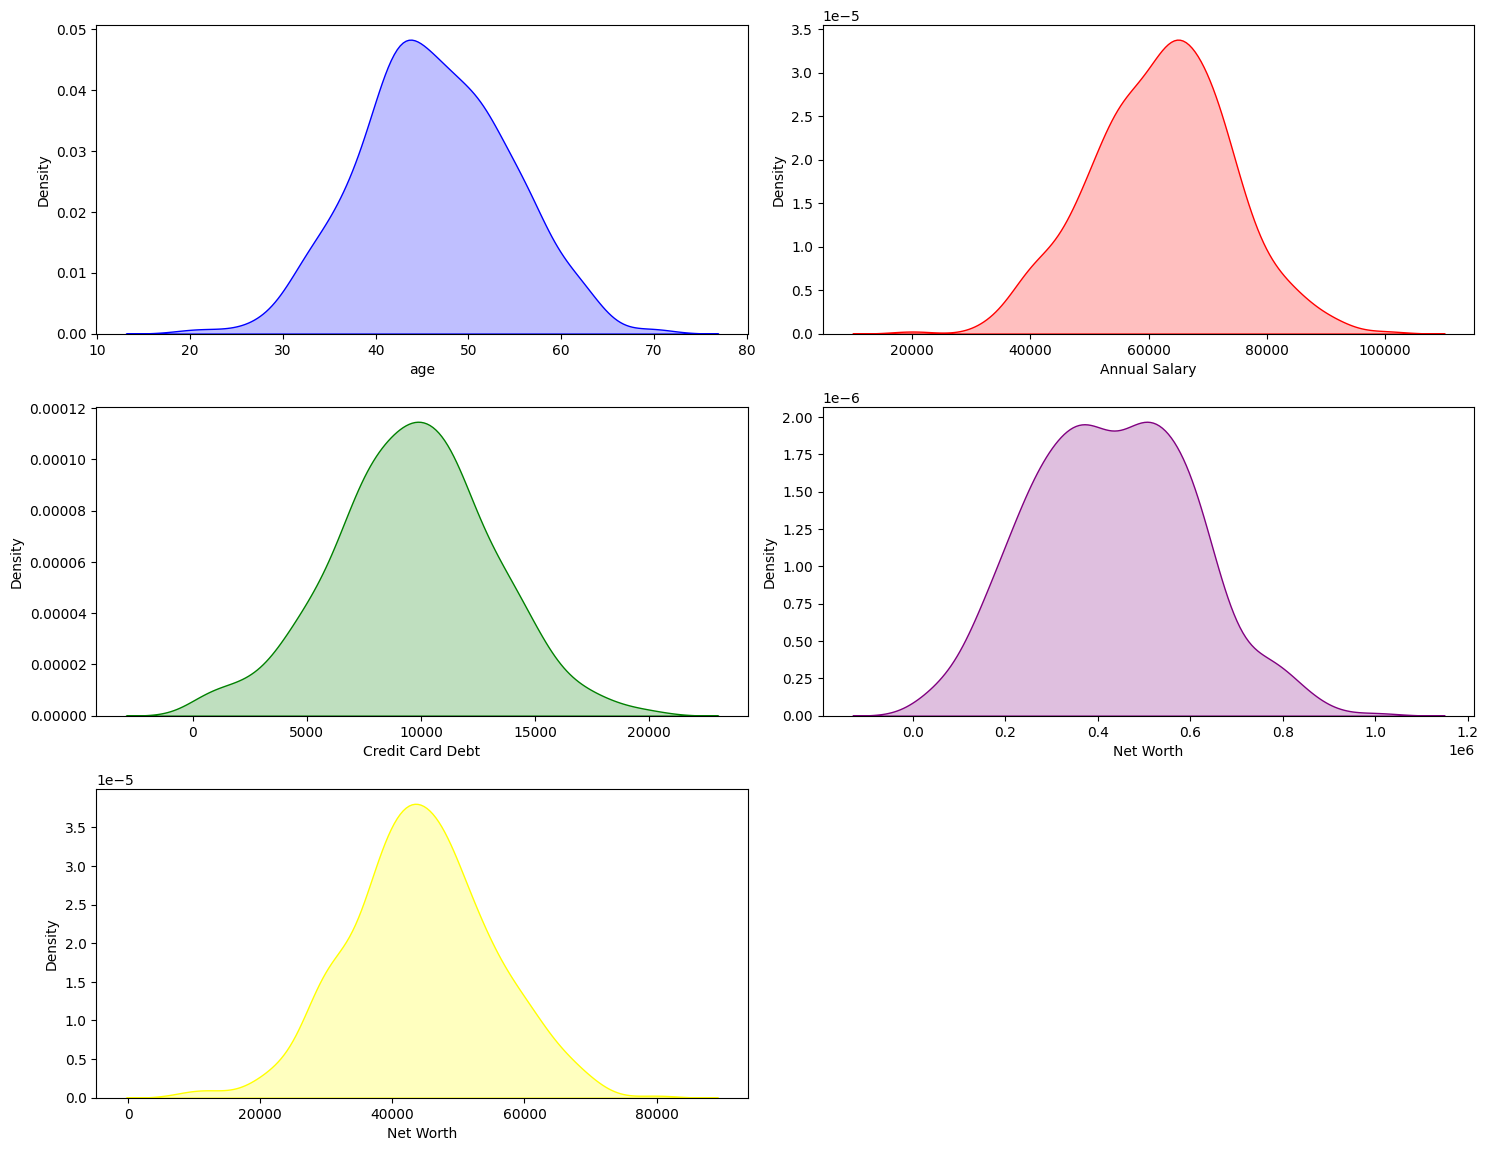

In [15]:

# Assuming df is your DataFrame

plt.figure(figsize=(15, 15))

# KDE plot for sepal_length with a specified color
plt.subplot(4, 2, 1)
sns.kdeplot(data=df, x='age', fill=True, color='blue')
plt.xlabel('age')

# KDE plot for sepal_width with a specified color
plt.subplot(4, 2, 2)
sns.kdeplot(data=df, x='annual Salary', fill=True, color='red')
plt.xlabel('Annual Salary')

# KDE plot for petal_length with a specified color
plt.subplot(4, 2, 3)
sns.kdeplot(data=df, x='credit card debt', fill=True, color='green')
plt.xlabel('Credit Card Debt')

# KDE plot for petal_width with a specified color
plt.subplot(4, 2, 4)
sns.kdeplot(data=df, x='net worth', fill=True, color='purple')
plt.xlabel('Net Worth')

plt.subplot(4, 2, 5)
sns.kdeplot(data=df, x='car purchase amount', fill=True, color='yellow')
plt.xlabel('Net Worth')

plt.tight_layout()
plt.show()


In [16]:
df= df.drop(['customer name','customer e-mail','country','gender'],axis=1)
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [15]:
X = df.drop(['car purchase amount'],axis=1)
X.head()

,age,annual Salary,credit card debt,net worth
0,41.851720,62812.09301,11609.380910,238961.2505
1,40.870623,66646.89292,9572.957136,530973.9078
2,43.152897,53798.55112,11160.355060,638467.1773
3,58.271369,79370.03798,14426.164850,548599.0524
4,57.313749,59729.15130,5358.712177,560304.0671


In [16]:
Y= df['car purchase amount']
Y.head()

0    35321.45877
1    45115.52566
2    42925.70921
3    67422.36313
4    55915.46248
Name: car purchase amount, dtype: float64

In [17]:
X.shape

(500, 4)

In [18]:
Y.shape

(500,)

In [19]:
scale=MinMaxScaler()
X=scale.fit_transform(X)
Y=scale.fit_transform(Y.values.reshape(-1,1))

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [21]:
print("The shape of training features : ",X_train.shape)
print("The shape of training target : ",Y_train.shape)
print("The shape of testing features : ",X_test.shape)
print("The shape of testing target : ",Y_test.shape)

The shape of training features :  (400, 4)
The shape of training target :  (400, 1)
The shape of testing features :  (100, 4)
The shape of testing target :  (100, 1)


In [22]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
lr_pred = lr.predict(X_test)


In [23]:
print("The Mean Squared error is : ", mean_squared_error(Y_test,lr_pred))
print("The Mean Absolute error is: ",mean_absolute_error(Y_test,lr_pred))
print("The R2 score is : ",r2_score(Y_test,lr_pred))
print("The K fold cross validation is: ",cross_val_score(lr,X,Y, cv=5, scoring='neg_mean_squared_error'))

The Mean Squared error is :  4.1059400703546534e-10
The Mean Absolute error is:  1.6198371057384864e-05
The R2 score is :  0.9999999808303804
The K fold cross validation is:  [-3.74238000e-10 -4.40707241e-10 -4.56331146e-10 -6.32635075e-10
 -3.17472560e-10]


In [24]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
rf_pred= rf.predict(X_test)

C:\Users\ahzam\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [25]:
print("The Mean Squared error is : ", mean_squared_error(Y_test,rf_pred))
print("The Mean Absolute error is: ",mean_absolute_error(Y_test,rf_pred))
print("The R2 score is : ",r2_score(Y_test,rf_pred))
print("The K fold cross validation is: ",cross_val_score(lr,X,Y, cv=5, scoring='neg_mean_squared_error'))

The Mean Squared error is :  0.001058637684258996
The Mean Absolute error is:  0.022317622598000034
The R2 score is :  0.9505748225731107
The K fold cross validation is:  [-3.74238000e-10 -4.40707241e-10 -4.56331146e-10 -6.32635075e-10
 -3.17472560e-10]
